# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/12_visualization_techniques`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/12_visualization_techniques/01_introduction.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# Introduction to Matrix and Tensor Visualization Techniques

Effective visualization is crucial for understanding matrices, tensors, and their transformations. In this series of notebooks, we'll explore various techniques for visualizing matrices and tensor operations to build intuition for n-dimensional thinking.

## Why Visualization Matters

Matrices and tensors are abstract mathematical objects, and visualizing them helps us:

1. **Develop intuition**: See patterns and relationships that may not be obvious from the raw numbers
2. **Debug algorithms**: Identify errors or unexpected behaviors in numerical operations
3. **Communicate results**: Share insights with others in a clear and intuitive way
4. **Understand transformations**: Visualize how operations change data in different dimensions

## What We'll Cover

In this series, we'll explore:

1. **Heatmaps and Colormaps**: Visualizing matrix values and correlations
2. **3D Visualizations**: Representing matrices and transformations in three dimensions
3. **Animation**: Illustrating dynamic processes and iterative algorithms
4. **Dimensionality Reduction**: Techniques for visualizing high-dimensional data
5. **Interactive Visualizations**: Tools for exploring data dynamically

Let's start with the basics of matrix visualization!


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Set style for plots
plt.style.use('ggplot')
sns.set(style="whitegrid", font_scale=1.2)

# Set seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)


## Basic Matrix Visualization: Heatmaps

Heatmaps are one of the most common ways to visualize matrices. They represent numerical values using colors, making it easy to spot patterns, correlations, and outliers.


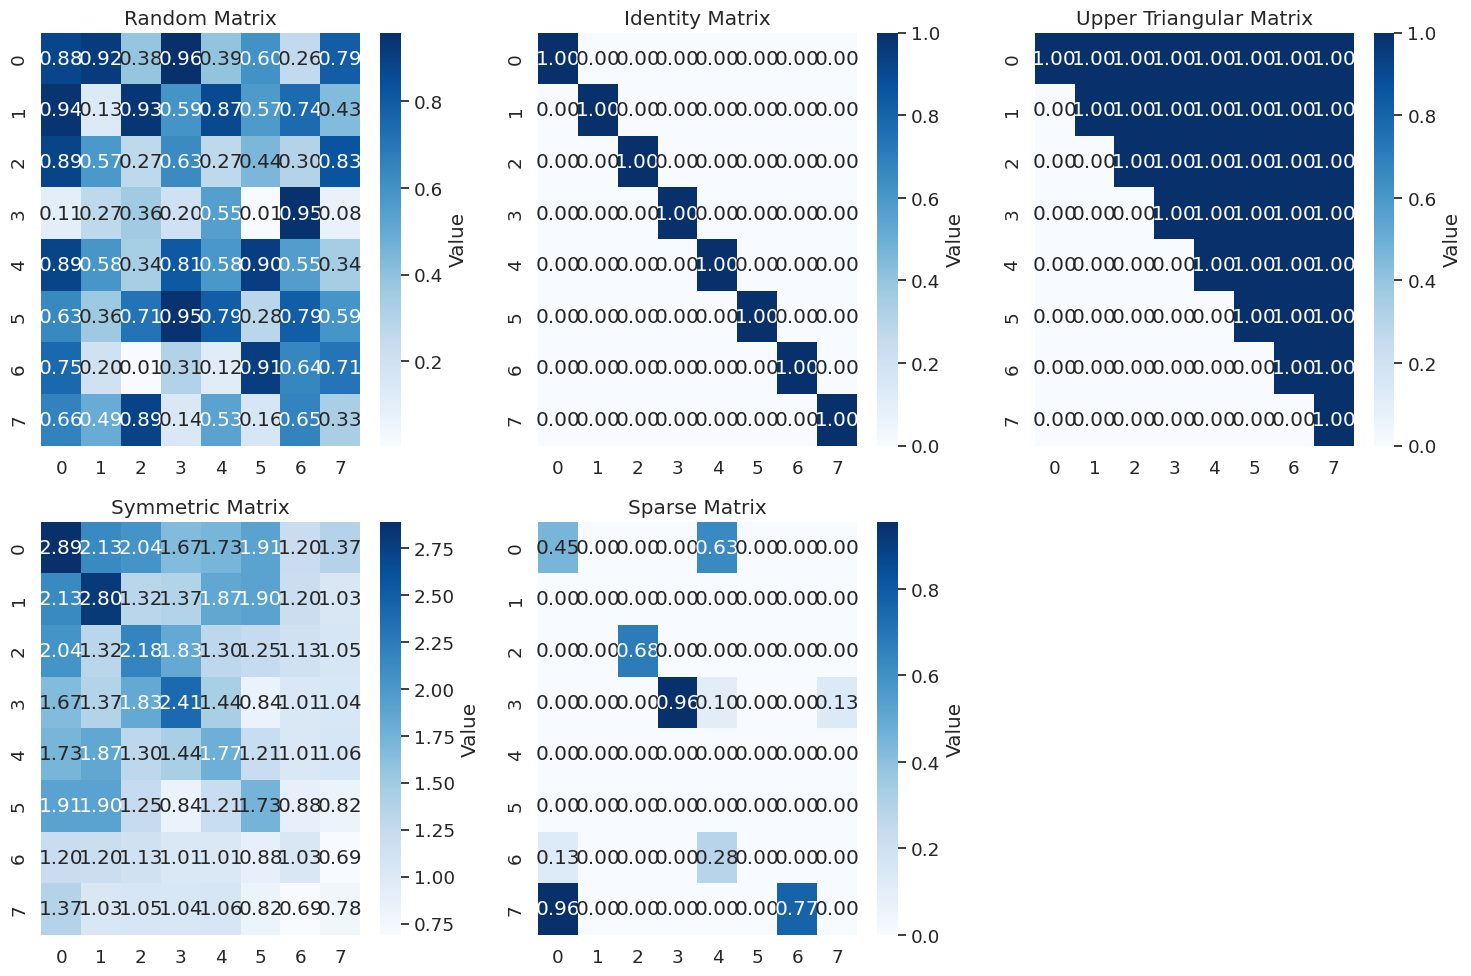

In [2]:
# Create different types of matrices to visualize
def create_matrices():
    # 1. Random matrix
    random_matrix = torch.rand(8, 8)
    
    # 2. Identity matrix
    identity_matrix = torch.eye(8)
    
    # 3. Upper triangular matrix
    upper_triangular = torch.triu(torch.ones(8, 8))
    
    # 4. Symmetric matrix
    A = torch.rand(8, 8)
    symmetric_matrix = torch.matmul(A, A.T)  # A·A^T is always symmetric
    
    # 5. Sparse matrix
    sparse_matrix = torch.zeros(8, 8)
    indices = torch.randint(0, 8, (10, 2))
    values = torch.rand(10)
    for i in range(10):
        sparse_matrix[indices[i, 0], indices[i, 1]] = values[i]
    
    return {
        'Random': random_matrix,
        'Identity': identity_matrix,
        'Upper Triangular': upper_triangular,
        'Symmetric': symmetric_matrix,
        'Sparse': sparse_matrix
    }

matrices = create_matrices()

# Visualize each matrix using a heatmap
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, matrix) in enumerate(matrices.items()):
    if i < len(axes):
        im = sns.heatmap(matrix, ax=axes[i], cmap='Blues', annot=(matrix.shape[0] <= 8), 
                   fmt=".2f", cbar_kws={'label': 'Value'})
        axes[i].set_title(f'{name} Matrix')

# Hide the empty subplot
if len(matrices) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


### Custom Colormaps

The choice of colormap can significantly impact how we perceive the data. Let's explore different colormaps and create a custom one optimized for matrix visualization.


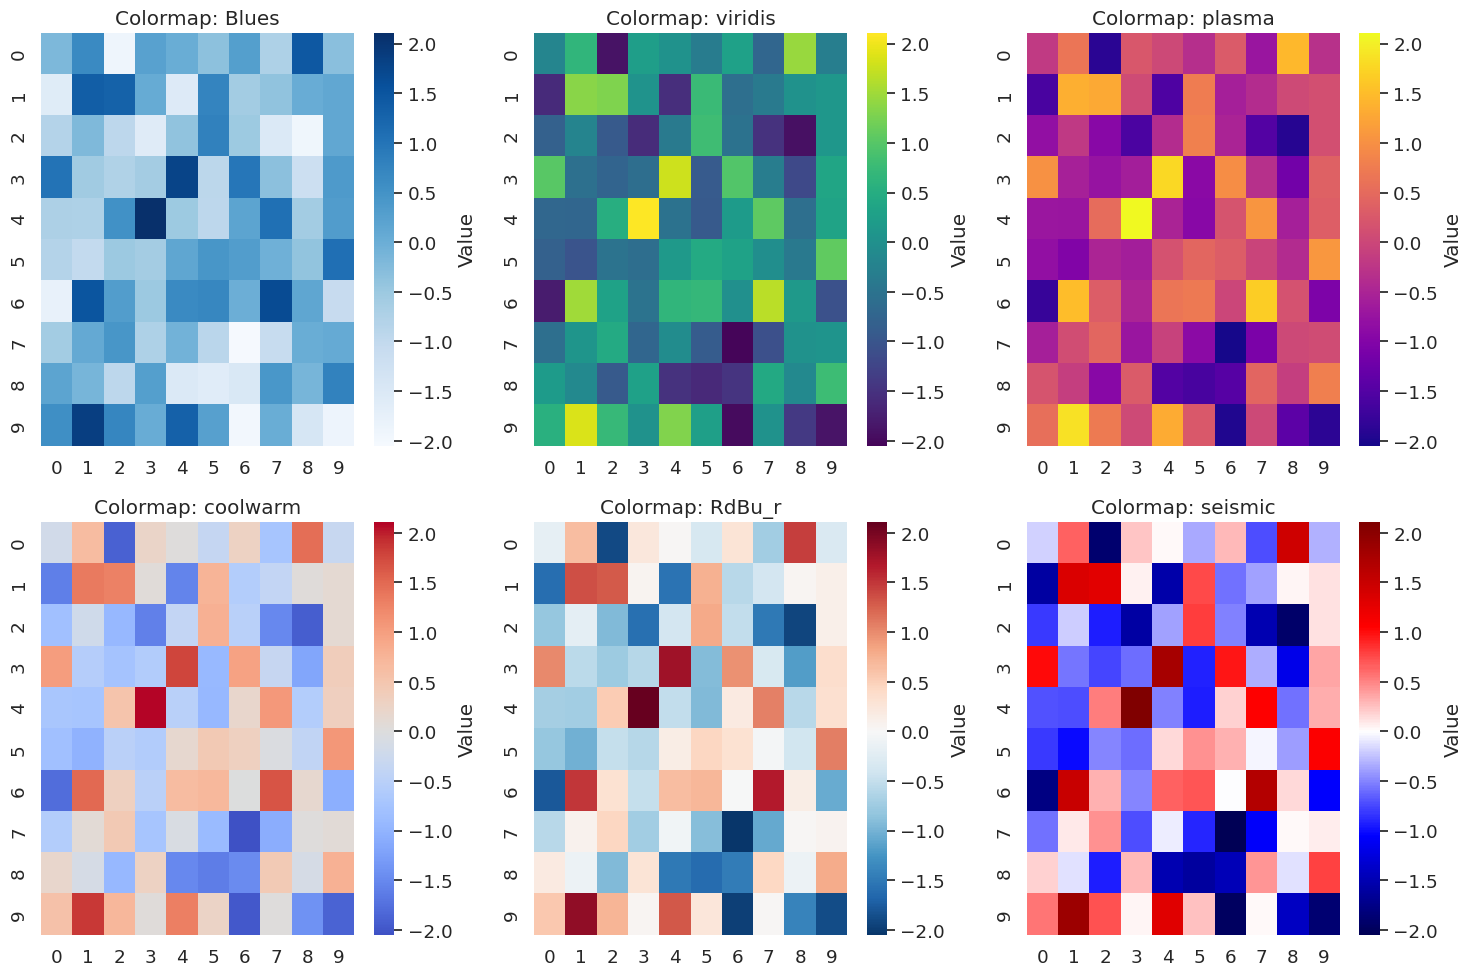

In [3]:
# Create a matrix with a mixture of positive and negative values
mixed_matrix = torch.randn(10, 10)

# Define a list of colormaps to compare
colormaps = ['Blues', 'viridis', 'plasma', 'coolwarm', 'RdBu_r', 'seismic']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, cmap_name in enumerate(colormaps):
    sns.heatmap(mixed_matrix, ax=axes[i], cmap=cmap_name, 
                center=0, annot=False, cbar_kws={'label': 'Value'})
    axes[i].set_title(f'Colormap: {cmap_name}')

plt.tight_layout()
plt.show()


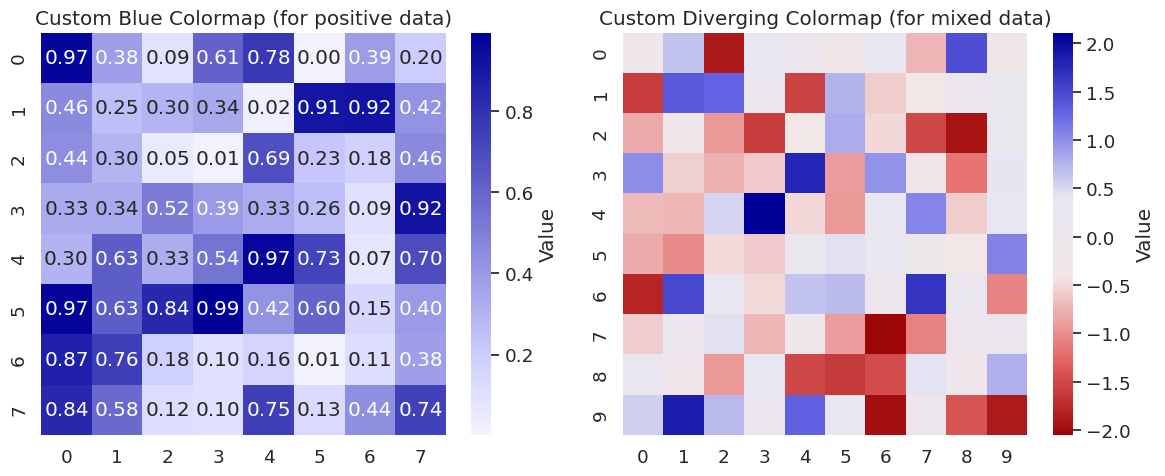

In [4]:
# Create a custom colormap specifically for matrix visualization
# Light blue to dark blue gradient (good for single-signed data)
colors = [(0.95, 0.95, 1), (0.8, 0.8, 1), (0.6, 0.6, 0.9), (0.4, 0.4, 0.8), 
          (0.2, 0.2, 0.7), (0, 0, 0.6)]
matrix_cmap = LinearSegmentedColormap.from_list('matrix_blues', colors)

# Create a diverging colormap for data with positive and negative values
# Dark red -> white -> dark blue
diverging_colors = [(0.6, 0, 0), (0.9, 0.4, 0.4), (0.95, 0.9, 0.9), 
                    (0.9, 0.9, 0.95), (0.4, 0.4, 0.9), (0, 0, 0.6)]
diverging_cmap = LinearSegmentedColormap.from_list('matrix_diverging', diverging_colors)

# Compare our custom colormaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# For a positive-only matrix
positive_matrix = torch.rand(8, 8)
sns.heatmap(positive_matrix, ax=axes[0], cmap=matrix_cmap, 
            annot=True, fmt=".2f", cbar_kws={'label': 'Value'})
axes[0].set_title('Custom Blue Colormap (for positive data)')

# For a mixed positive/negative matrix
sns.heatmap(mixed_matrix, ax=axes[1], cmap=diverging_cmap, 
            center=0, annot=False, cbar_kws={'label': 'Value'})
axes[1].set_title('Custom Diverging Colormap (for mixed data)')

plt.tight_layout()
plt.show()


## Annotated Matrix Visualization

For educational purposes, it's often helpful to annotate matrix visualizations with additional information like row/column labels, indices, and mathematical notation.


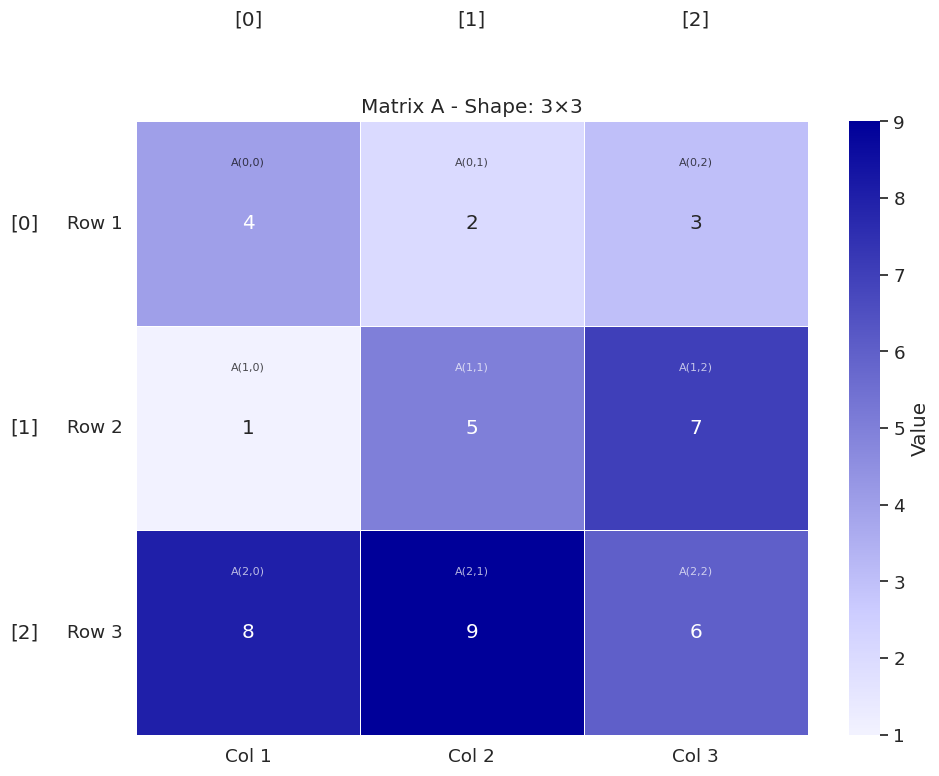

In [5]:
# Create a small matrix for detailed annotation
A = torch.tensor([[4, 2, 3], 
                 [1, 5, 7], 
                 [8, 9, 6]])

# Create row and column labels
row_labels = ['Row 1', 'Row 2', 'Row 3']
col_labels = ['Col 1', 'Col 2', 'Col 3']

plt.figure(figsize=(10, 8))

# Create the heatmap with annotations
ax = sns.heatmap(A, annot=True, fmt="d", cmap=matrix_cmap, linewidths=0.5,
            cbar_kws={'label': 'Value'})

# Add row and column labels
ax.set_yticklabels(row_labels, rotation=0)
ax.set_xticklabels(col_labels)

# Add indices in brackets
for i in range(len(row_labels)):
    ax.text(-0.5, i + 0.5, f"[{i}]", horizontalalignment='center', 
            verticalalignment='center')
    
for j in range(len(col_labels)):
    ax.text(j + 0.5, -0.5, f"[{j}]", horizontalalignment='center', 
            verticalalignment='center')

# Add mathematical notation - A(i,j)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        ax.text(j + 0.5, i + 0.2, f"A({i},{j})", 
                horizontalalignment='center', verticalalignment='center',
                color='white' if A[i, j] > 4 else 'black',
                fontsize=8, alpha=0.7)

# Add matrix shape information
plt.title(f"Matrix A - Shape: {A.shape[0]}×{A.shape[1]}")

plt.tight_layout()
plt.show()


## Visualizing Matrix Patterns and Special Matrices

Many special matrices have distinct visual patterns. Let's visualize some common special matrices to build intuition for their structure.


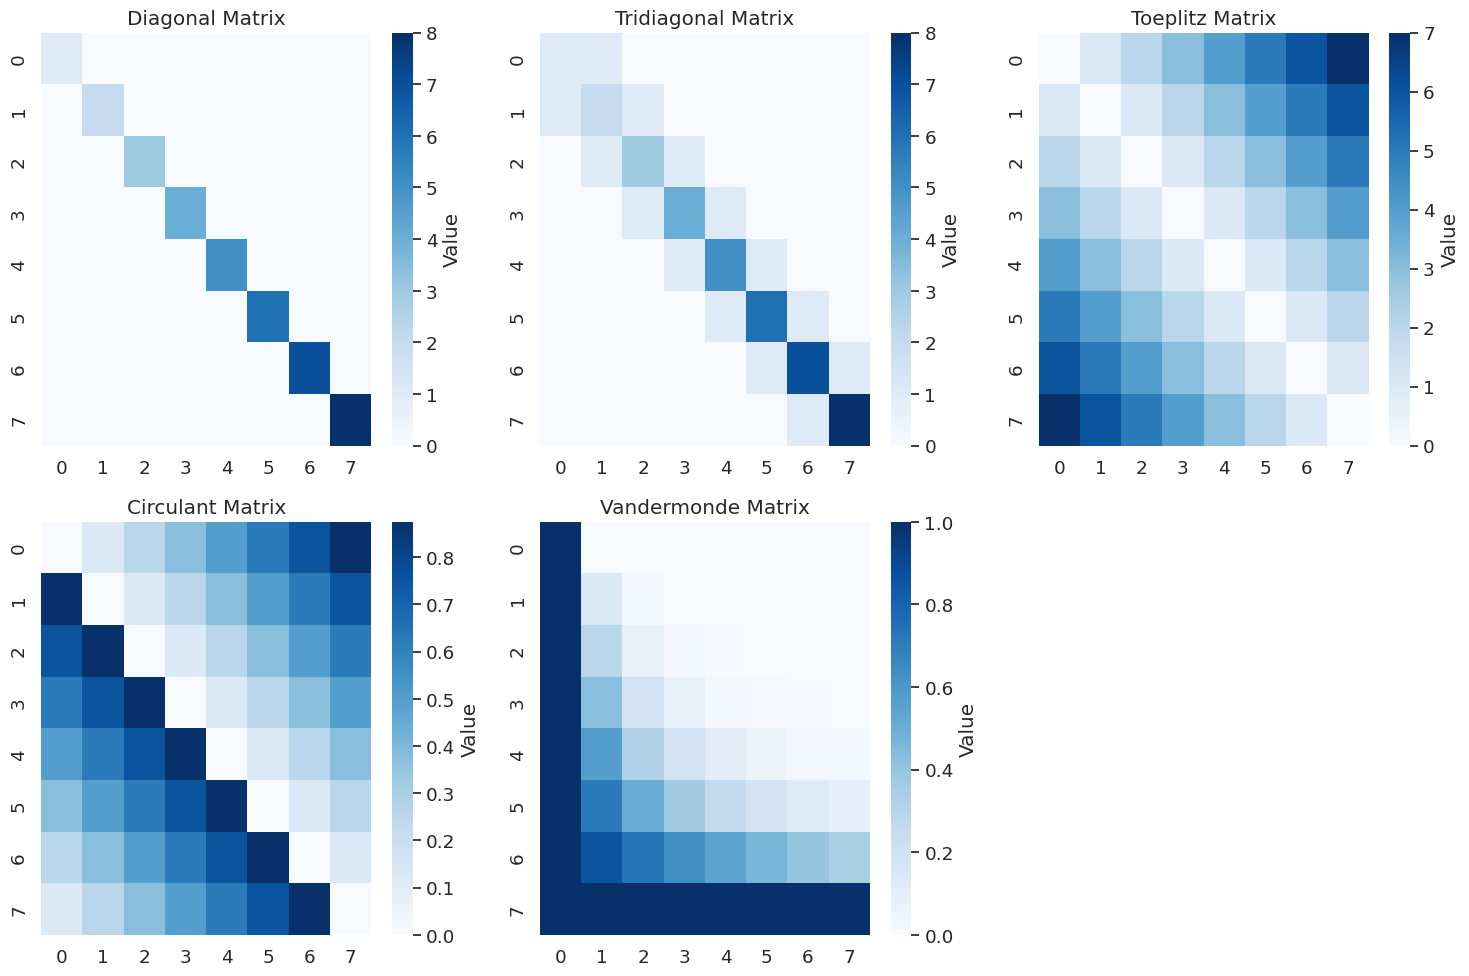

In [6]:
# Create special matrices with distinctive patterns
def create_special_matrices(n=8):
    # 1. Diagonal matrix
    diag_values = torch.arange(1, n+1, dtype=torch.float)
    diagonal = torch.diag(diag_values)
    
    # 2. Tridiagonal matrix
    tridiagonal = torch.diag(diag_values) + torch.diag(torch.ones(n-1), 1) + torch.diag(torch.ones(n-1), -1)
    
    # 3. Toeplitz matrix (constant along diagonals)
    toeplitz = torch.zeros(n, n)
    for i in range(n):
        for j in range(n):
            toeplitz[i, j] = abs(i - j)
    
    # 4. Circulant matrix
    circulant = torch.zeros(n, n)
    first_row = torch.arange(n, dtype=torch.float) / n
    for i in range(n):
        circulant[i] = torch.roll(first_row, i)
    
    # 5. Vandermonde matrix
    x = torch.linspace(0, 1, n)
    vandermonde = torch.zeros(n, n)
    for i in range(n):
        for j in range(n):
            vandermonde[i, j] = x[i] ** j
    
    return {
        'Diagonal': diagonal,
        'Tridiagonal': tridiagonal,
        'Toeplitz': toeplitz,
        'Circulant': circulant,
        'Vandermonde': vandermonde
    }

special_matrices = create_special_matrices(8)

# Visualize each special matrix
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, matrix) in enumerate(special_matrices.items()):
    if i < len(axes):
        im = sns.heatmap(matrix, ax=axes[i], cmap='Blues', 
                   cbar_kws={'label': 'Value'})
        axes[i].set_title(f'{name} Matrix')

# Hide the empty subplot
if len(special_matrices) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


## Visualizing Matrix Decompositions

Let's visualize a matrix decomposition to see how the components relate to the original matrix. We'll use the SVD (Singular Value Decomposition) as an example.


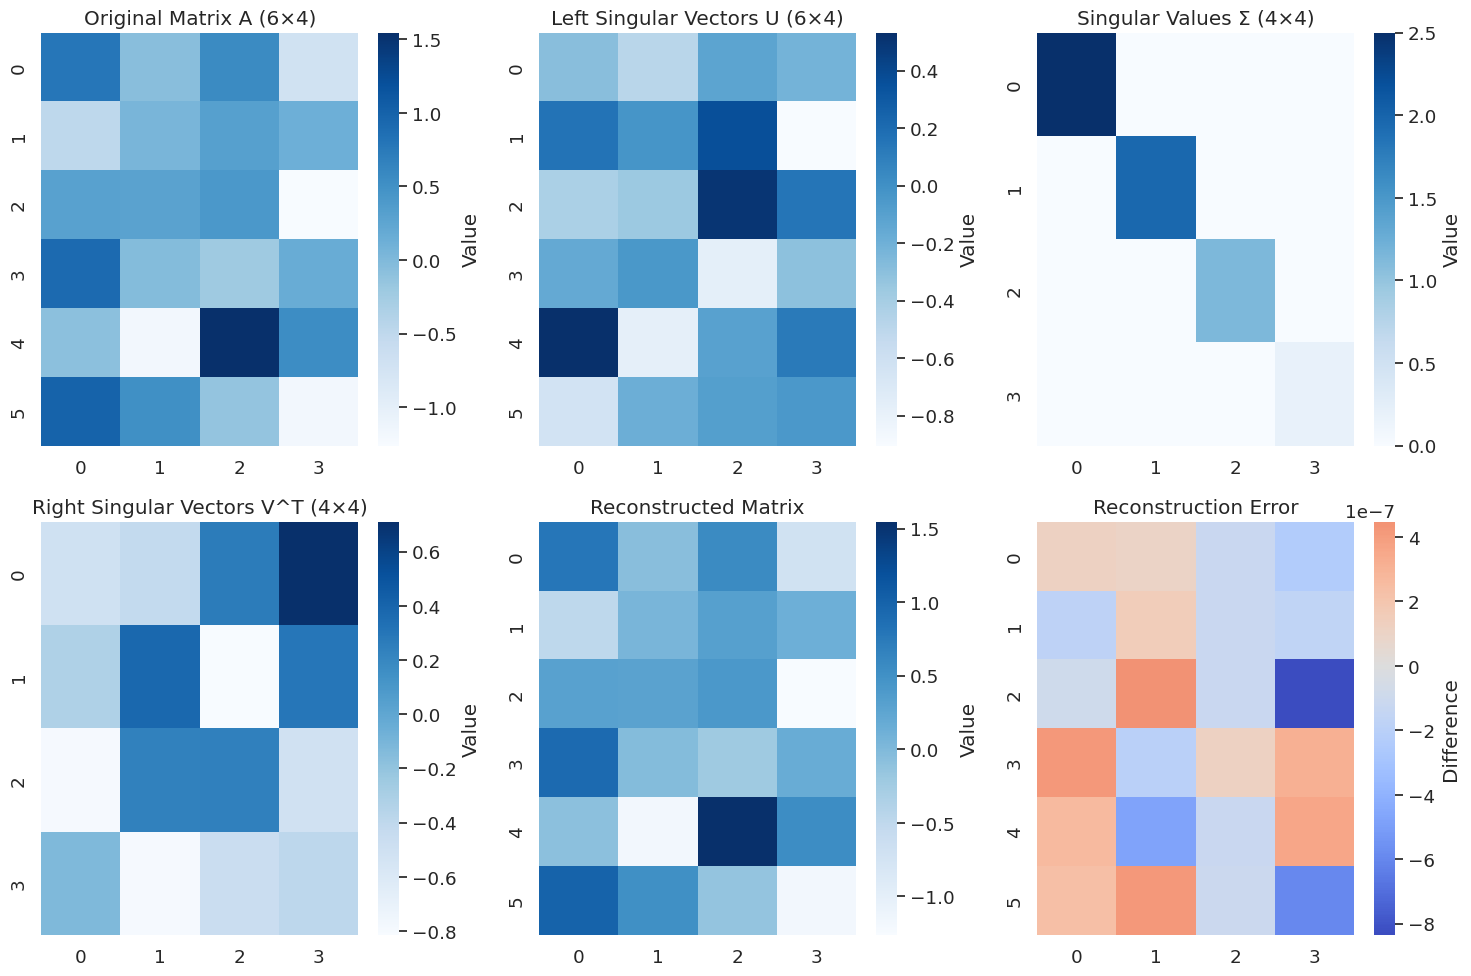

In [7]:
# Create a 6x4 matrix for SVD visualization
A = torch.randn(6, 4)

# Compute SVD: A = U * Σ * V^T
U, S, V = torch.svd(A)

# Convert singular values to diagonal matrix
S_diag = torch.zeros(U.shape[1], V.shape[0])
for i in range(min(S.shape[0], S_diag.shape[0], S_diag.shape[1])):
    S_diag[i, i] = S[i]

# Visualize the components and reconstruction
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original matrix
im1 = sns.heatmap(A, ax=axes[0, 0], cmap='Blues', 
            cbar_kws={'label': 'Value'})
axes[0, 0].set_title(f'Original Matrix A ({A.shape[0]}×{A.shape[1]})')

# Left singular vectors (U)
im2 = sns.heatmap(U, ax=axes[0, 1], cmap='Blues', 
            cbar_kws={'label': 'Value'})
axes[0, 1].set_title(f'Left Singular Vectors U ({U.shape[0]}×{U.shape[1]})')

# Singular values (Σ)
im3 = sns.heatmap(S_diag, ax=axes[0, 2], cmap='Blues', 
            cbar_kws={'label': 'Value'})
axes[0, 2].set_title(f'Singular Values Σ ({S_diag.shape[0]}×{S_diag.shape[1]})')

# Right singular vectors (V^T)
im4 = sns.heatmap(V.T, ax=axes[1, 0], cmap='Blues', 
            cbar_kws={'label': 'Value'})
axes[1, 0].set_title(f'Right Singular Vectors V^T ({V.shape[1]}×{V.shape[0]})')

# Reconstruction: A ≈ U * Σ * V^T
reconstruction = torch.matmul(torch.matmul(U, S_diag), V.T)
im5 = sns.heatmap(reconstruction, ax=axes[1, 1], cmap='Blues', 
            cbar_kws={'label': 'Value'})
axes[1, 1].set_title('Reconstructed Matrix')

# Error: A - (U * Σ * V^T)
error = A - reconstruction
im6 = sns.heatmap(error, ax=axes[1, 2], cmap='coolwarm', center=0,
            cbar_kws={'label': 'Difference'})
axes[1, 2].set_title('Reconstruction Error')

plt.tight_layout()
plt.show()


## Visualizing Matrix Norms and Properties

Visual representations can help us understand matrix properties such as norms, condition numbers, and rank.


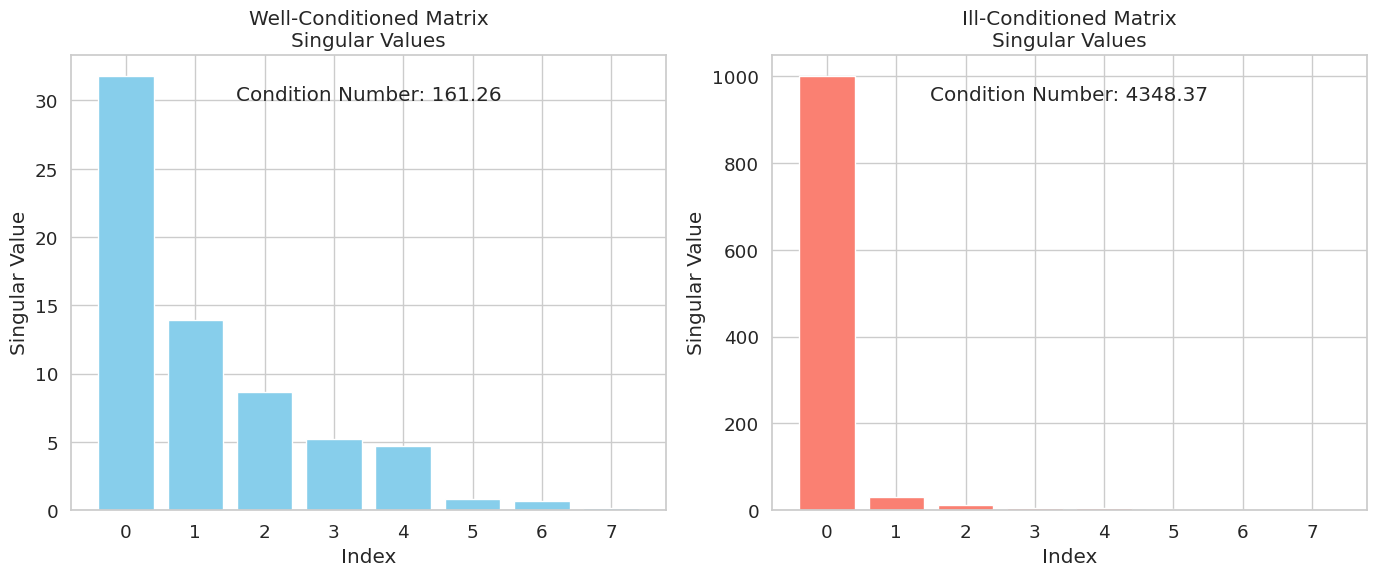

In [8]:
# Create a few matrices with different properties
rand_matrix = torch.randn(8, 8)
well_conditioned = torch.matmul(rand_matrix, rand_matrix.T)  # Symmetric positive definite
ill_conditioned = well_conditioned.clone()
ill_conditioned[0, 0] = 1000  # Make one eigenvalue much larger

# Compute some matrix properties
def matrix_properties(matrix):
    U, S, V = torch.svd(matrix)
    frobenius_norm = torch.norm(matrix, p='fro').item()
    nuclear_norm = torch.sum(S).item()  # Sum of singular values
    spectral_norm = torch.max(S).item()  # Maximum singular value
    condition_number = torch.max(S).item() / torch.min(S).item()
    
    return {
        'Singular Values': S.numpy(),
        'Frobenius Norm': frobenius_norm,
        'Nuclear Norm': nuclear_norm,
        'Spectral Norm': spectral_norm,
        'Condition Number': condition_number
    }

well_props = matrix_properties(well_conditioned)
ill_props = matrix_properties(ill_conditioned)

# Visualize the singular value distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot singular values
axes[0].bar(range(len(well_props['Singular Values'])), 
           well_props['Singular Values'], color='skyblue')
axes[0].set_title('Well-Conditioned Matrix\nSingular Values')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Singular Value')
axes[0].text(0.5, 0.9, f"Condition Number: {well_props['Condition Number']:.2f}", 
           transform=axes[0].transAxes, ha='center')

axes[1].bar(range(len(ill_props['Singular Values'])), 
           ill_props['Singular Values'], color='salmon')
axes[1].set_title('Ill-Conditioned Matrix\nSingular Values')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Singular Value')
axes[1].text(0.5, 0.9, f"Condition Number: {ill_props['Condition Number']:.2f}", 
           transform=axes[1].transAxes, ha='center')

plt.tight_layout()
plt.show()


## Visualizing Matrix Operations

Let's visualize some common matrix operations like addition, multiplication, and transposition.


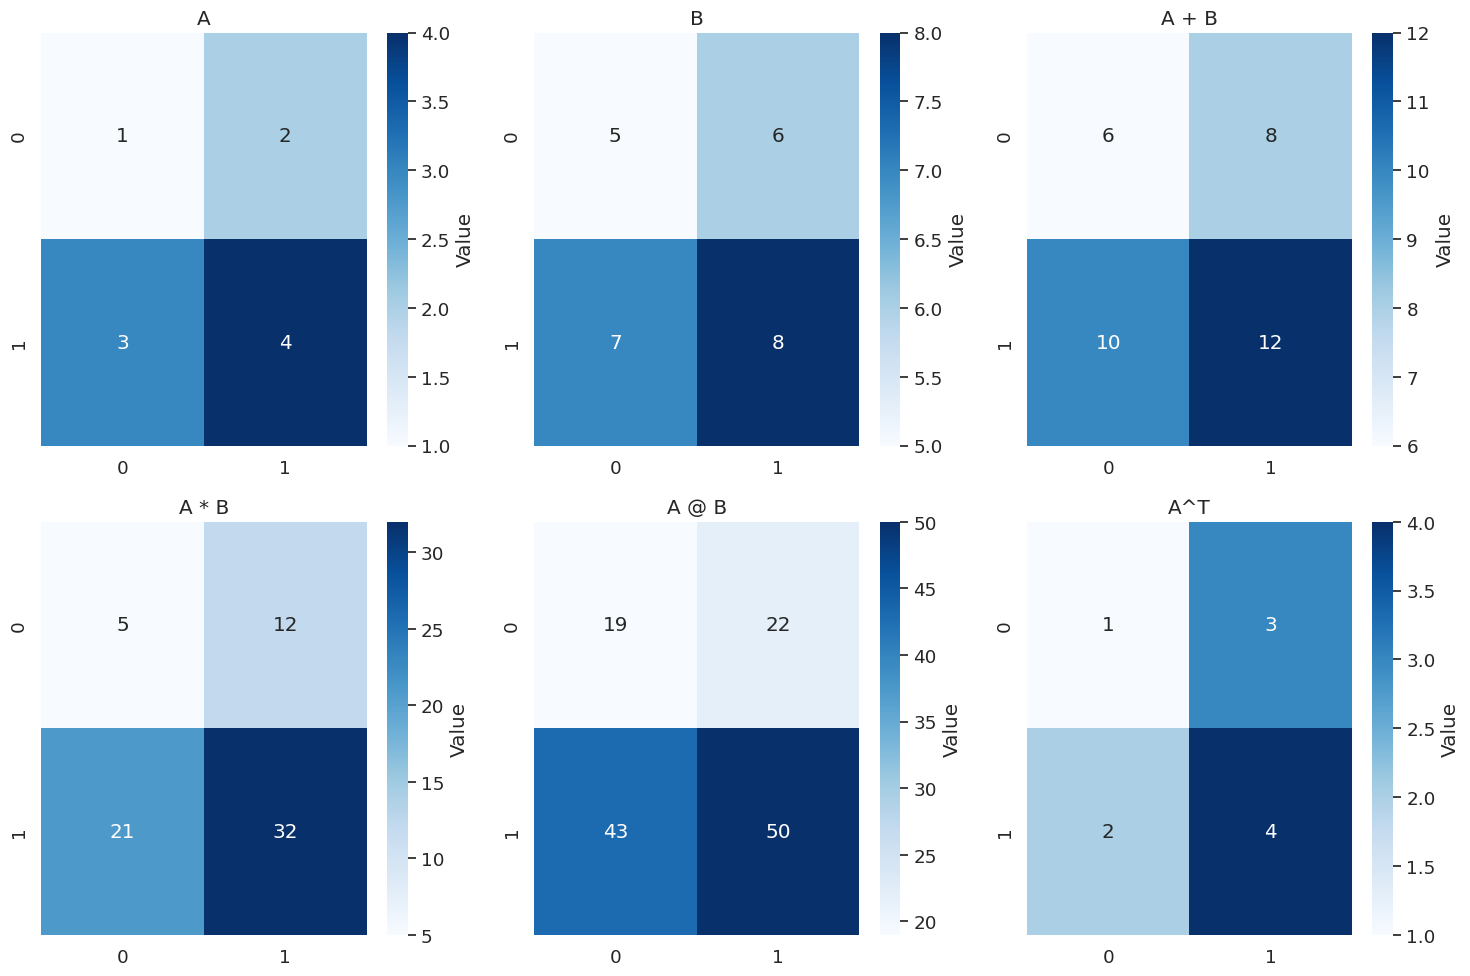

In [9]:
# Create two small matrices for operation visualization
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])

# Compute various operations
operations = {
    'A': A,
    'B': B,
    'A + B': A + B,
    'A * B': A * B,  # Element-wise multiplication
    'A @ B': A @ B,  # Matrix multiplication
    'A^T': A.T,      # Transpose
}

# Visualize each operation
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, result) in enumerate(operations.items()):
    im = sns.heatmap(result, ax=axes[i], cmap='Blues', annot=True, fmt=".0f",
               cbar_kws={'label': 'Value'})
    axes[i].set_title(name)

plt.tight_layout()
plt.show()


## Introducing 3D Visualizations

For matrices that represent 3D data or transformations, 3D visualizations can be very helpful. Let's introduce some basic 3D plotting techniques that we'll explore more in the next notebook.


/home/codespace/.local/lib/python3.12/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


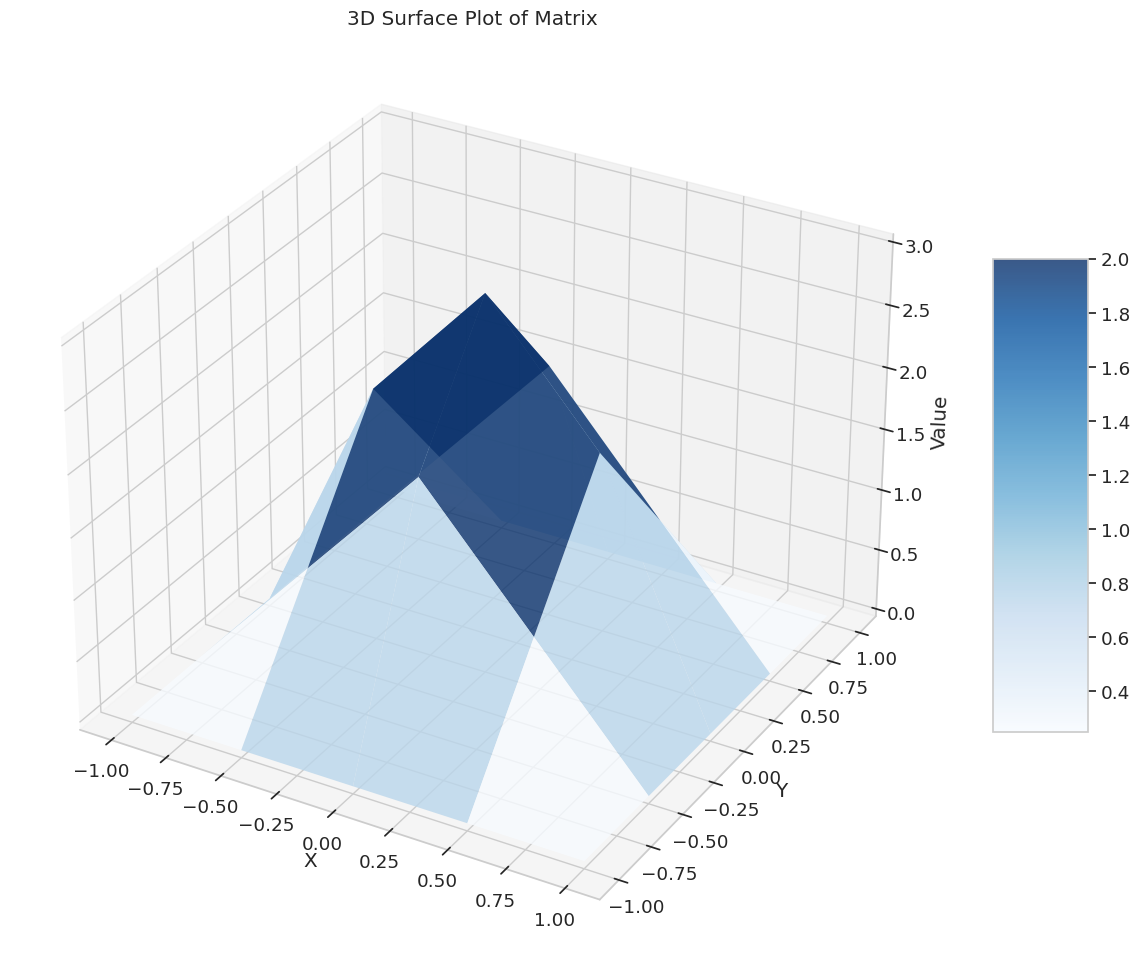

In [10]:
# Create a 3D surface plot from a matrix
Z = torch.tensor([
    [0, 0, 0, 0, 0],
    [0, 1, 2, 1, 0],
    [0, 2, 3, 2, 0],
    [0, 1, 2, 1, 0],
    [0, 0, 0, 0, 0]
], dtype=torch.float)

# Create x and y coordinates
x = torch.linspace(-1, 1, Z.shape[1])
y = torch.linspace(-1, 1, Z.shape[0])
X, Y = torch.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.8)

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Value')
ax.set_title('3D Surface Plot of Matrix')

plt.tight_layout()
plt.show()


## Summary

In this introductory notebook, we've explored various techniques for visualizing matrices and their properties:

1. **Heatmaps**: The most common way to visualize matrices, using color to represent values
2. **Custom Colormaps**: Choosing appropriate colormaps for different types of data
3. **Annotated Matrices**: Adding labels, indices, and mathematical notation
4. **Special Matrices**: Visualizing patterns in matrices with specific structures
5. **Matrix Decompositions**: Understanding components like SVD visually
6. **Matrix Properties**: Visualizing norms, condition numbers, and singular values
7. **Matrix Operations**: Seeing how operations transform matrices
8. **3D Visualization**: Introducing surface plots for matrices

In the next notebook, we'll dive deeper into 3D visualizations and explore how to visualize linear transformations.